In [ ]:
* 에이전트, 상태, 행동, 보상, 정책 
* 에피소드 : 첫 시작부터 끝 도착지점까지의 과정

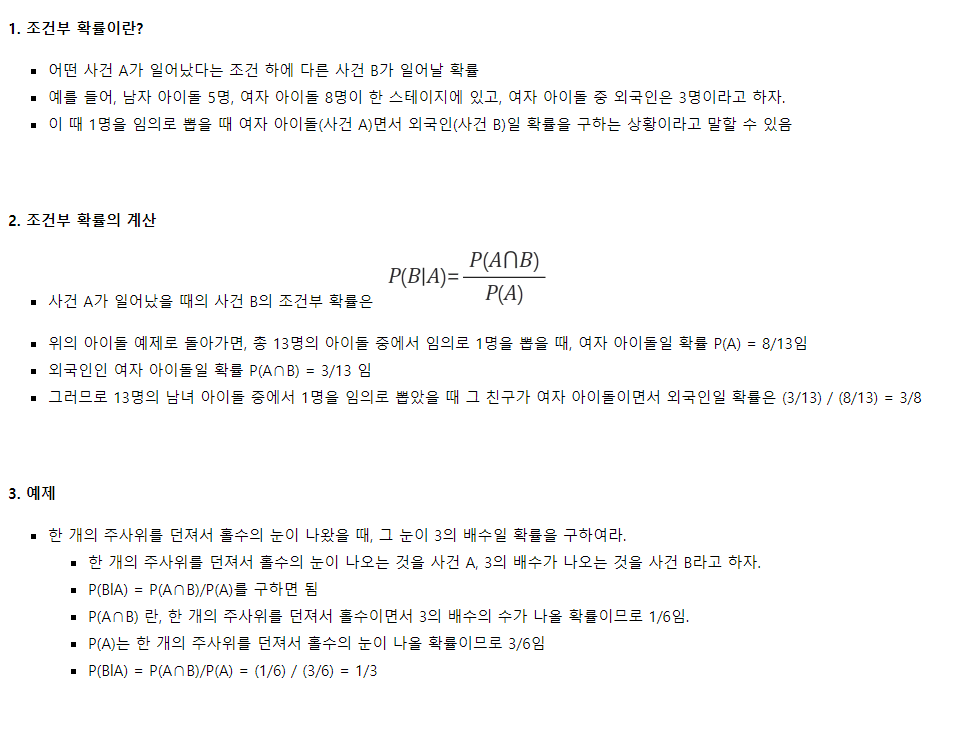
이미지 출처 : https://benpark.tistory.com/308

In [6]:
# 몬테카를로 방식사용
import random

no_sw_win = list()
sw_win = list()

doors = {'A', 'B', 'C'}

count = 1000000

for x in range(count):
    # 상품이 있는 문
    prize = random.sample(doors, 1)
    
    # 플레이어가 선택할 문
    pick = random.sample(doors, 1)
    
    tmp_set = set()
    tmp_set.add(prize[0])
    tmp_set.add(pick[0])
    
    # 진행자가 문을 오픈(게임자가 선택한 문과 상품이 있는 문 제외)
    open_door = random.sample(doors - tmp_set, 1)
    
    sw = doors - set(open_door) - set(pick)
    
    # 그대로 go
    if (pick == prize):
        no_sw_win.append("Win")
        
    # 무슨소리야! 확률이 올라간다고! 바꿀래
    if (list(sw) == prize):
        sw_win.append("Win")

In [7]:
# 바꾸지 않았을 때
len(no_sw_win) / count

0.333278

In [8]:
# 바꾸었을 때
len(sw_win) / count

0.666722

In [12]:
import random
import numpy as np

class GridWorld():
    def __init__(self):
        self.x=0
        self.y=0
    
    def step(self, a):
        # 0번 액션: 왼쪽, 1번 액션: 위, 2번 액션: 오른쪽, 3번 액션: 아래쪽
        if a==0:
            self.move_left()
        elif a==1:
            self.move_up()
        elif a==2:
            self.move_right()
        elif a==3:
            self.move_down()

        reward = -1 # 보상은 항상 -1로 고정
        done = self.is_done()
        return (self.x, self.y), reward, done

    def move_left(self):
        if self.y==0:
            pass
        elif self.y==3 and self.x in [0,1,2]:
            pass
        elif self.y==5 and self.x in [2,3,4]:
            pass
        else:
            self.y -= 1

    def move_right(self):
        if self.y==1 and self.x in [0,1,2]:
            pass
        elif self.y==3 and self.x in [2,3,4]:
            pass
        elif self.y==6:
            pass
        else:
            self.y += 1
      
    def move_up(self):
        if self.x==0:
            pass
        elif self.x==3 and self.y==2:
            pass
        else:
            self.x -= 1

    def move_down(self):
        if self.x==4:
            pass
        elif self.x==1 and self.y==4:
            pass
        else:
            self.x+=1

    def is_done(self):
        if self.x==4 and self.y==6:
            return True
        else:
            return False
      
    def reset(self):
        self.x = 0
        self.y = 0
        return (self.x, self.y)

class QAgent():
    def __init__(self):
        self.q_table = np.zeros((5, 7, 4)) # 마찬가지로 Q 테이블을 0으로 초기화
        self.eps = 0.9

    def select_action(self, s):
        # eps-greedy로 액션을 선택해준다
        x, y = s
        coin = random.random()
        if coin < self.eps:
            action = random.randint(0,3)
        else:
            action_val = self.q_table[x,y,:]
            action = np.argmax(action_val)
        return action

    def update_table(self, transition):
        s, a, r, s_prime = transition
        x,y = s
        next_x, next_y = s_prime
        a_prime = self.select_action(s_prime) # S'에서 선택할 액션 (실제로 취한 액션이 아님)
        # Q러닝 업데이트 식을 이용 
        self.q_table[x,y,a] = self.q_table[x,y,a] + 0.1 * (r + np.amax(self.q_table[next_x,next_y,:]) - self.q_table[x,y,a])

    def anneal_eps(self):
        self.eps -= 0.01  # Q러닝에선 epsilon 이 좀더 천천히 줄어 들도록 함.
        self.eps = max(self.eps, 0.2) 

    def show_table(self):
        q_lst = self.q_table.tolist()
        data = np.zeros((5,7))
        for row_idx in range(len(q_lst)):
            row = q_lst[row_idx]
            for col_idx in range(len(row)):
                col = row[col_idx]
                action = np.argmax(col)
                data[row_idx, col_idx] = action
        print(data)
      
    
def main():
    env = GridWorld()
    agent = QAgent()

    for n_epi in range(1000):
        done = False

        s = env.reset()
        while not done:
            a = agent.select_action(s)
            s_prime, r, done = env.step(a)
            agent.update_table((s,a,r,s_prime))
            s = s_prime
        agent.anneal_eps()

    agent.show_table()

if __name__ == '__main__':
    main()

[[2. 3. 0. 2. 3. 2. 3.]
 [3. 3. 0. 2. 2. 3. 3.]
 [2. 3. 0. 1. 0. 3. 3.]
 [2. 2. 2. 1. 0. 3. 3.]
 [2. 2. 1. 1. 0. 2. 0.]]
